In [6]:
#import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
import matplotlib

#load the dataset
df=pd.read_csv(r"data.csv",encoding='latin1')

#understand the dataset
df.info()
df_describe=df.describe()
df.head()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


(541909, 8)

(406829, 8)

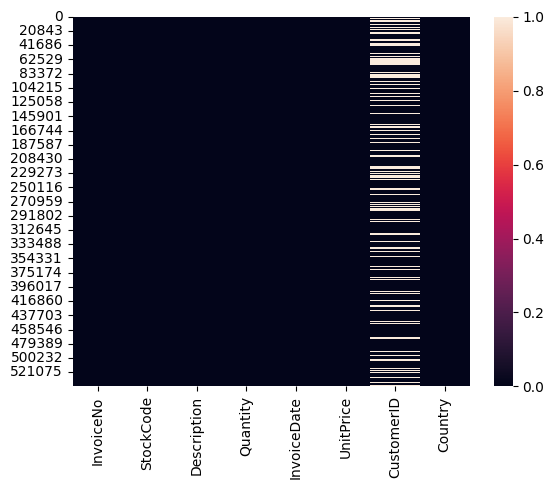

In [7]:
#find the null values
df.isnull().sum()
sns.heatmap(df.isnull())

#remove the null values
df=df.dropna()
# Drop rows where InvoiceNo contains a letter 'C' (indicating a canceled transaction)
df.shape


In [10]:
print((df[df['InvoiceNo'].str.contains('C')]).count())
df = df.drop(df[df['InvoiceNo'].str.contains('C')].index)##删除No。含有C的行
df.shape

InvoiceNo      8905
StockCode      8905
Description    8905
Quantity       8905
InvoiceDate    8905
UnitPrice      8905
CustomerID     8905
Country        8905
dtype: int64


(397924, 8)

<Axes: >

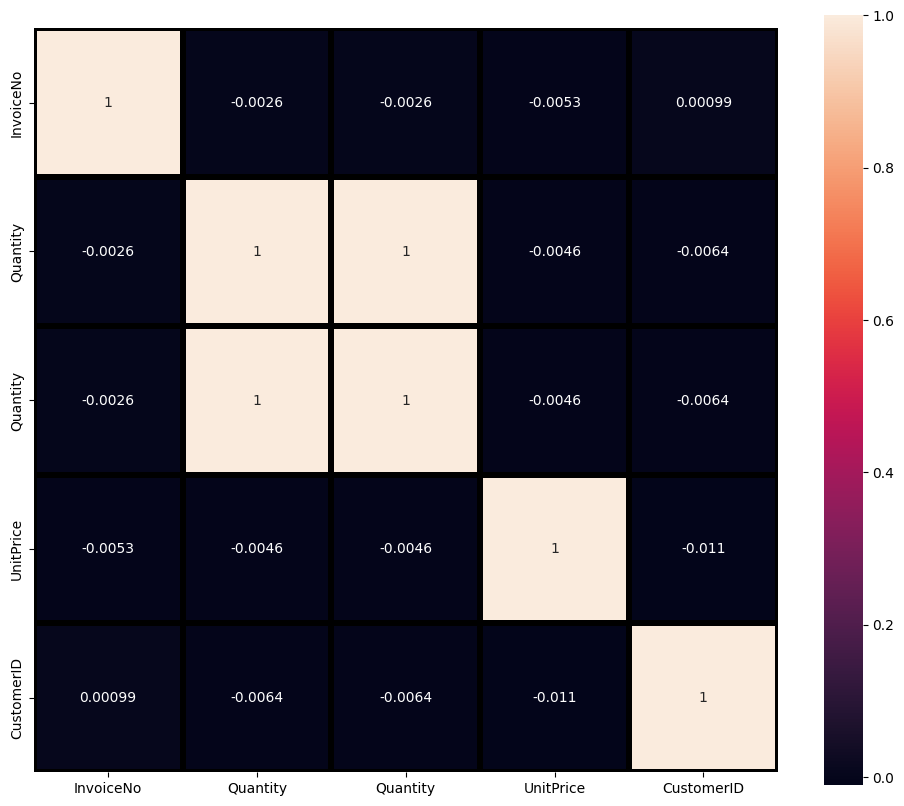

In [14]:
#calculate the 总金额
TotalAmount = df['Quantity'] * df['UnitPrice']
df.insert(loc=6, column = 'TotalAmount', value=TotalAmount)

#correlation matrix
df_corr=df[["InvoiceNo","Quantity","Quantity","UnitPrice","CustomerID"]].corr()
plt.figure(figsize = (12,10))
sns.heatmap(df_corr,square=True,annot=True,linewidths=4,linecolor='k')



In [15]:
#convert datatype of the required columns
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#split date and time
df['month']= pd.to_datetime(df['InvoiceDate']).dt.month
#df['day'] = pd.to_datetime(df['InvoiceDate']).dt.dayofweek
df['day_number'] = pd.to_datetime(df['InvoiceDate']).dt.day
df['year'] = pd.to_datetime(df['InvoiceDate']).dt.year
df['hour'] = pd.to_datetime(df['InvoiceDate']).dt.hour
df['m_y']=pd.to_datetime(df['InvoiceDate']).dt.to_period('M')

df['m_y']=df['m_y'].astype(str)

#finding unique values of certain columns
df['year'].unique()
df['month'].unique()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalAmount,CustomerID,Country,month,day_number,year,hour,m_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom,12,1,2010,8,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,12,1,2010,8,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom,12,1,2010,8,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,12,1,2010,8,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,12,1,2010,8,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,10.20,12680.0,France,12,9,2011,12,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12.60,12680.0,France,12,9,2011,12,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,16.60,12680.0,France,12,9,2011,12,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,16.60,12680.0,France,12,9,2011,12,2011-12


In [16]:
#创建一个新列，显示每个国家/地区的具体数字
df['Country_Category']=df["Country"].astype('category').cat.codes
df['InvoiceNo']=df["InvoiceNo"].astype('category').cat.codes
df['StockCode']=df["StockCode"].astype('category').cat.codes
df['Description']=df["Description"].astype('category').cat.codes
df['Description']=df["Description"].astype('category').cat.codes
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalAmount,CustomerID,Country,month,day_number,year,hour,m_y,Country_Category
0,0,3233,3698,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom,12,1,2010,8,2010-12,35
1,0,2643,3706,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,12,1,2010,8,2010-12,35
2,0,2847,858,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom,12,1,2010,8,2010-12,35
3,0,2795,1804,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,12,1,2010,8,2010-12,35
4,0,2794,2763,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,12,1,2010,8,2010-12,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,18535,1466,2253,12,2011-12-09 12:50:00,0.85,10.20,12680.0,France,12,9,2011,12,2011-12,13
541905,18535,1742,692,6,2011-12-09 12:50:00,2.10,12.60,12680.0,France,12,9,2011,12,2011-12,13
541906,18535,2082,698,4,2011-12-09 12:50:00,4.15,16.60,12680.0,France,12,9,2011,12,2011-12,13
541907,18535,2083,697,4,2011-12-09 12:50:00,4.15,16.60,12680.0,France,12,9,2011,12,2011-12,13


In [17]:
#create a dataframe showing the number represented by each country
a=df['Country'].unique()
b=df['Country_Category'].unique()
data = a,b
Countries = pd.DataFrame(data=data)
Countries

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,United Kingdom,France,Australia,Netherlands,Germany,Norway,EIRE,Switzerland,Spain,Poland,...,Saudi Arabia,Czech Republic,Canada,Unspecified,Brazil,USA,European Community,Bahrain,Malta,RSA
1,35,13,0,23,14,24,10,32,30,25,...,28,8,5,36,4,33,11,2,22,27


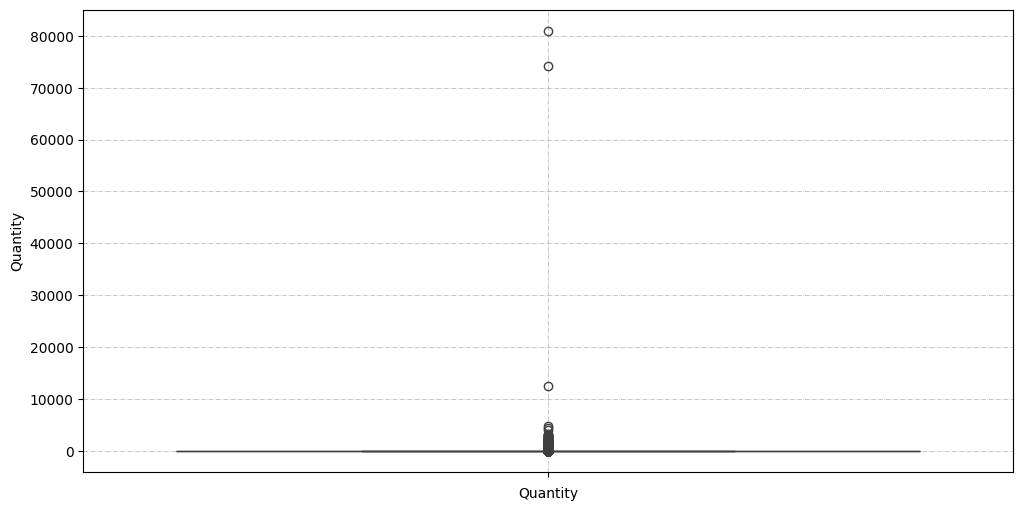

In [19]:
#boxplot of Quantity
plt.figure(figsize = (12,6))
sns.boxplot(df['Quantity'])
plt.xlabel("Quantity")
plt.grid(linestyle='-.',linewidth = .5)

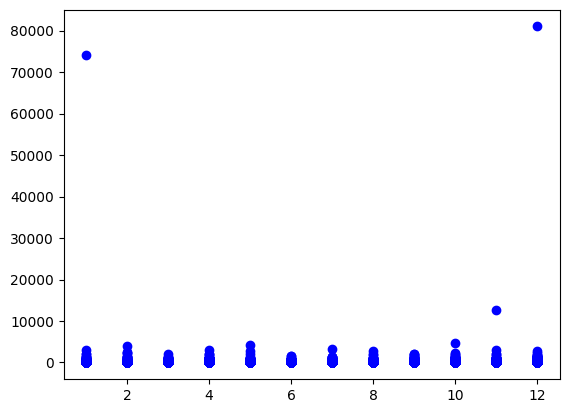

In [22]:
#scatter plot of quantity vs month
plt.scatter(df['month'],df['Quantity'],color="blue")
plt.show()

In [23]:
#删除 Quantity 的异常值 <0.9  >0.1
max_quantity=df['Quantity'].quantile(0.90)
a1=df[df['Quantity']>max_quantity]
min_quantity=df['Quantity'].quantile(0.10)
b1=df[df['Quantity']<min_quantity]
df=df[(df['Quantity']<max_quantity) & (df['Quantity']>min_quantity)]

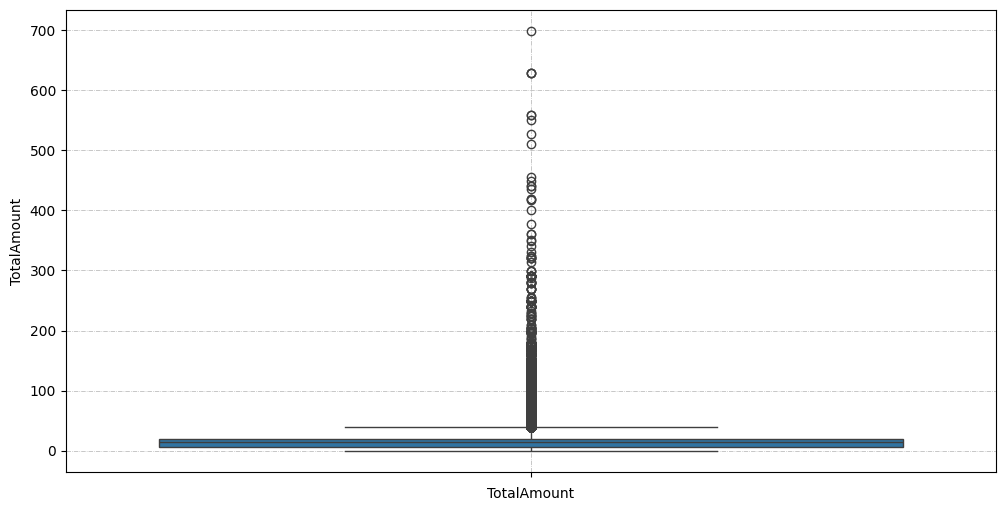

In [25]:
#boxplot of TotalAmount
plt.figure(figsize = (12,6))
sns.boxplot(df['TotalAmount'])
plt.xlabel("TotalAmount")
plt.grid(linestyle='-.',linewidth = .5)

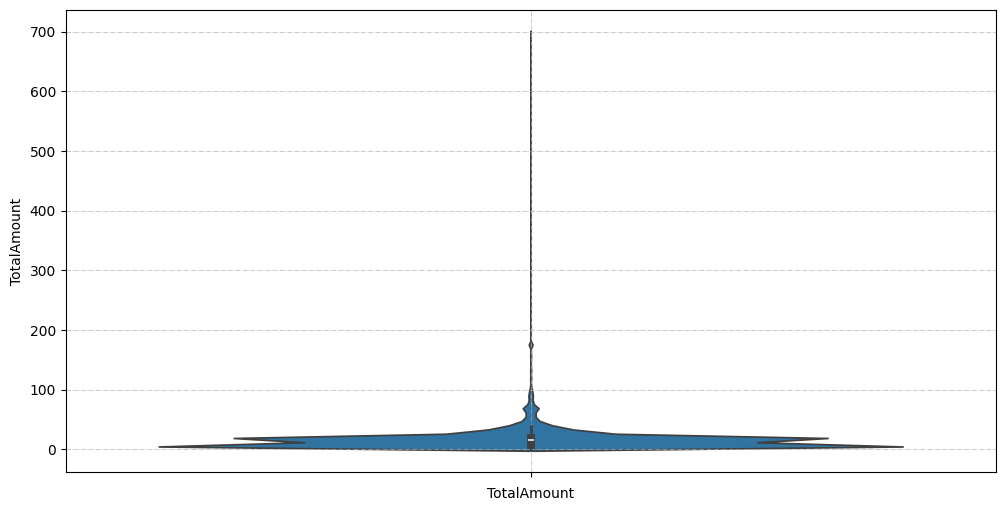

In [26]:
#violin plot of TotalAmount
plt.figure(figsize = (12,6))
sns.violinplot(df['TotalAmount'])
plt.xlabel("TotalAmount")
plt.grid(linestyle='-.',linewidth = .5)

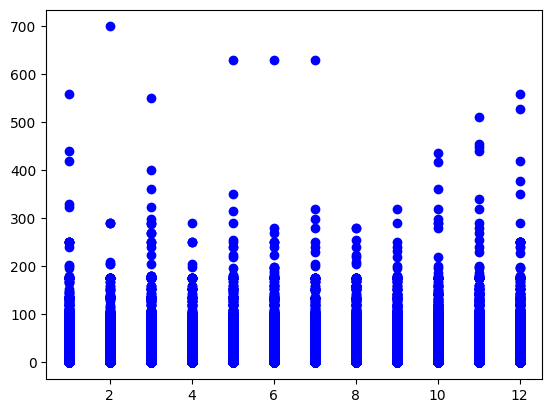

In [27]:
#scatter plot of TotalAmount vs month
plt.scatter(df['month'],df['TotalAmount'],color="blue")
plt.show()

In [28]:
#删除 TotalAmount 的异常值
max_TotalAmount=df['TotalAmount'].quantile(0.92)
a2=df[df['TotalAmount']>max_TotalAmount]
min_TotalAmount=df['TotalAmount'].quantile(0.08)
b2=df[df['TotalAmount']<min_TotalAmount]
df=df[(df['TotalAmount']<max_TotalAmount) & (df['TotalAmount']>min_TotalAmount)]

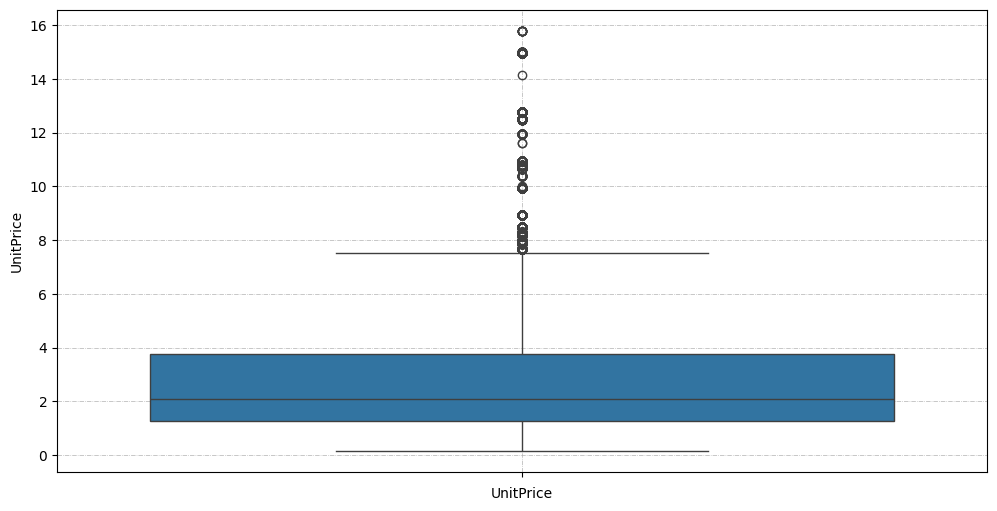

In [30]:
#boxplot of UnitPrice
plt.figure(figsize = (12,6))
sns.boxplot(df['UnitPrice'])
plt.xlabel("UnitPrice")
plt.grid(linestyle='-.',linewidth = .5)

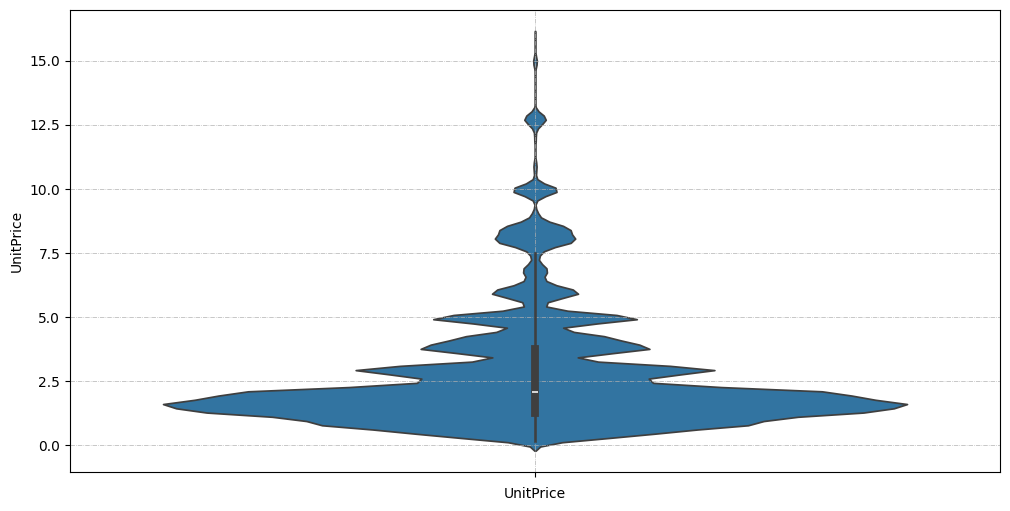

In [31]:
#violin plot of UnitPrice
plt.figure(figsize = (12,6))
sns.violinplot(df['UnitPrice'])
plt.xlabel("UnitPrice")
plt.grid(linestyle='-.',linewidth = .5)

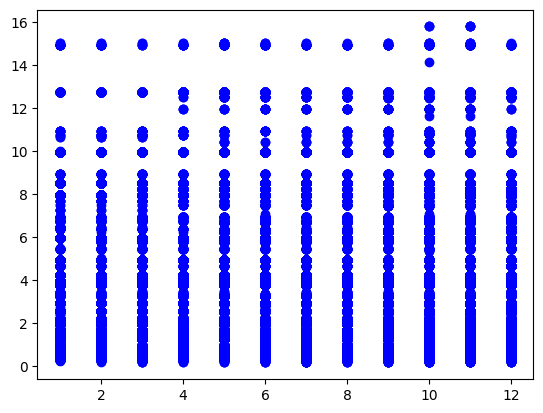

In [32]:
#scatter plot of UnitPrice vs month
plt.scatter(df['month'],df['UnitPrice'],color="blue")
plt.show()

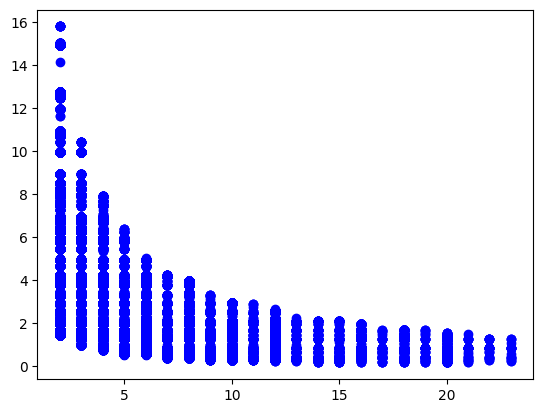

In [33]:
#scatter plot of quantity vs unit price
plt.scatter(df['Quantity'],df['UnitPrice'],color="blue")
plt.show()

In [34]:
#删除 UnitPric 的异常值
max_UnitPrice=df['UnitPrice'].quantile(0.85)
a2=df[df['UnitPrice']>max_UnitPrice]
min_UnitPrice=df['UnitPrice'].quantile(0.15)
b2=df[df['UnitPrice']<min_UnitPrice]
df=df[(df['UnitPrice']<max_UnitPrice) & (df['UnitPrice']>min_UnitPrice)]

Text(0, 0.5, 'Quantity')

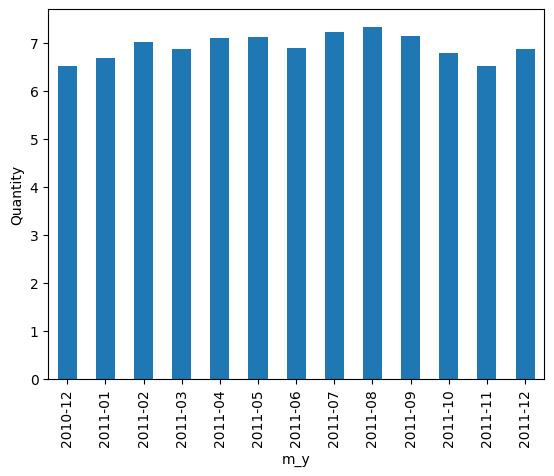

In [35]:
#bargraph of month wise quantity
df.groupby(['m_y'])['Quantity'].mean().plot(kind='bar')
plt.ylabel('Quantity')

Text(0, 0.5, 'UnitPrice')

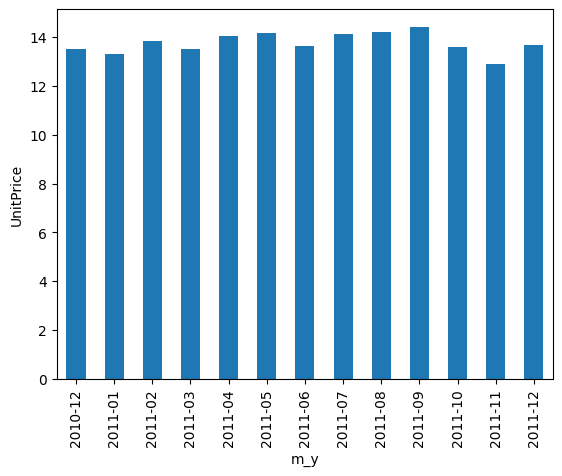

In [36]:
#bargraph of month wise TotalAmount
df.groupby(['m_y'])['TotalAmount'].mean().plot(kind='bar')
plt.ylabel('UnitPrice')

Text(0, 0.5, 'Quantity')

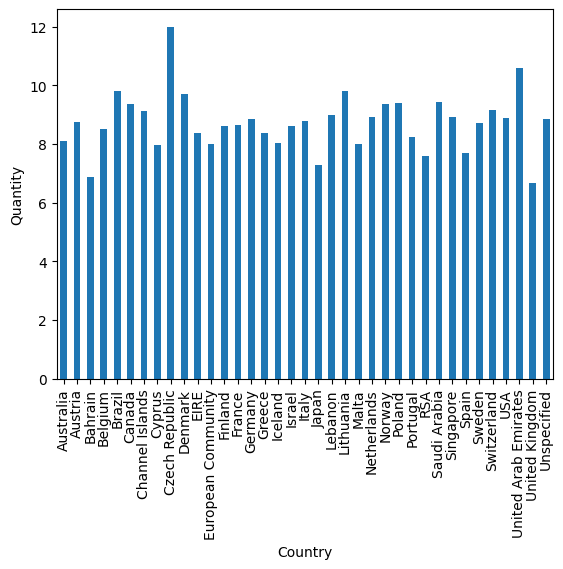

In [37]:
#bargraph of country wise quantity
df.groupby(['Country'])['Quantity'].mean().plot(kind='bar')
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

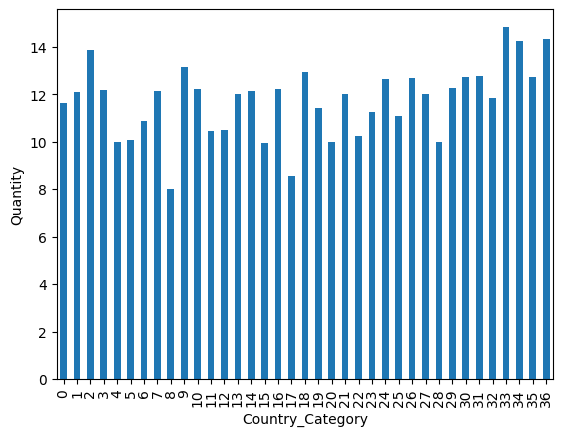

In [38]:
#bargraph of country wise hourly orders
df.groupby(['Country_Category'])['hour'].mean().plot(kind='bar')
plt.ylabel('Quantity')

Text(0, 0.5, 'UnitPrice')

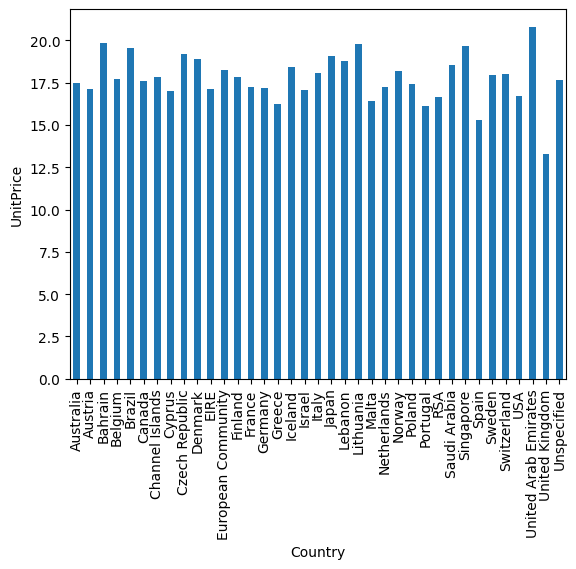

In [39]:
#bargraph of country wise TotalAmount
df.groupby(['Country'])['TotalAmount'].mean().plot(kind='bar')
plt.ylabel('UnitPrice')

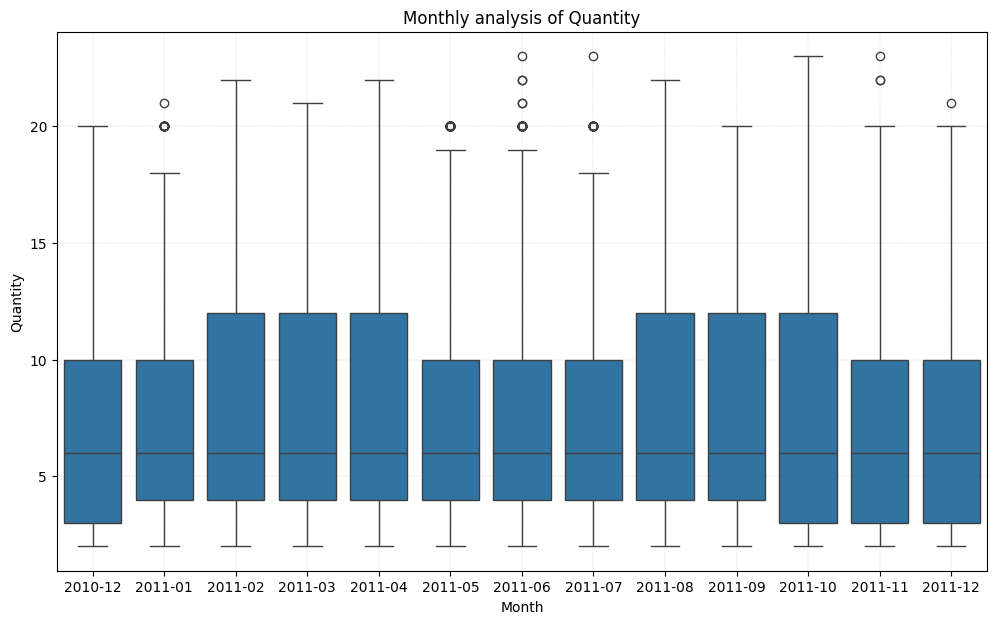

In [40]:
#boxplot of Quantity for monthly analysis
plt.figure(figsize=(12,7))
sns.boxplot(x='m_y', y = 'Quantity', data = df)
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title("Monthly analysis of Quantity")
plt.grid(linestyle='-.',linewidth = .2)

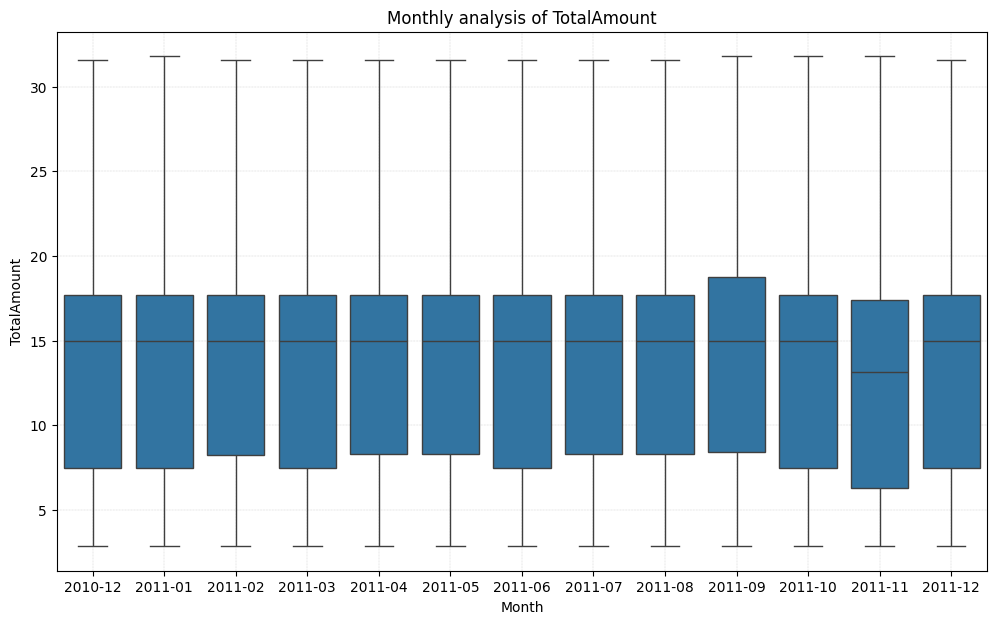

In [41]:
#boxplot of TotalAmount for monthly analysis
plt.figure(figsize=(12,7))
sns.boxplot(x='m_y', y = 'TotalAmount', data = df)
plt.xlabel('Month')
plt.ylabel('TotalAmount')
plt.title("Monthly analysis of TotalAmount")
plt.grid(linestyle='-.',linewidth = .2)

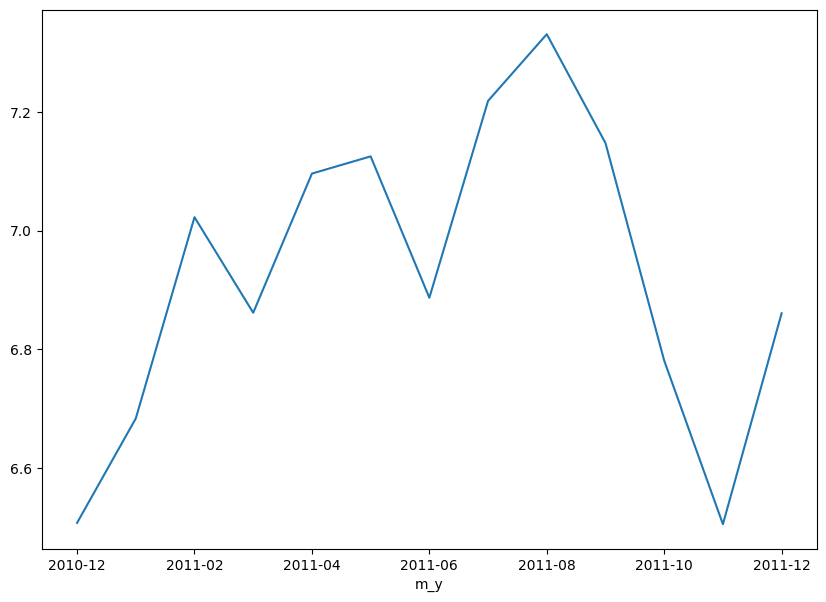

In [44]:
#linegraph of month vs quantity
fig, ax = plt.subplots(figsize=(10,7))
df.groupby(['m_y'])['Quantity'].mean().plot(ax=ax)
plt.show(fig,ax)

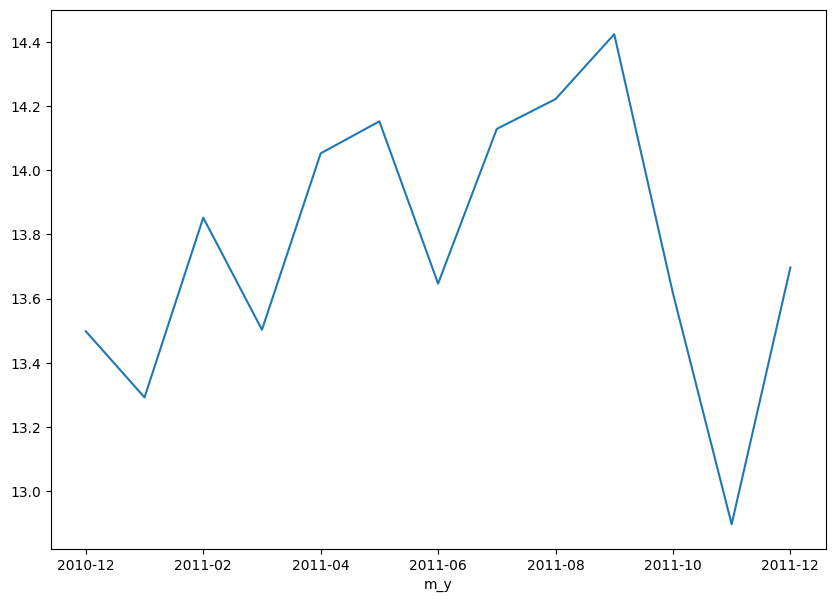

In [45]:
#linegraph of month vs TotalAmount
fig, ax = plt.subplots(figsize=(10,7))
df.groupby(['m_y'])['TotalAmount'].mean().plot(ax=ax)
plt.show(fig,ax)

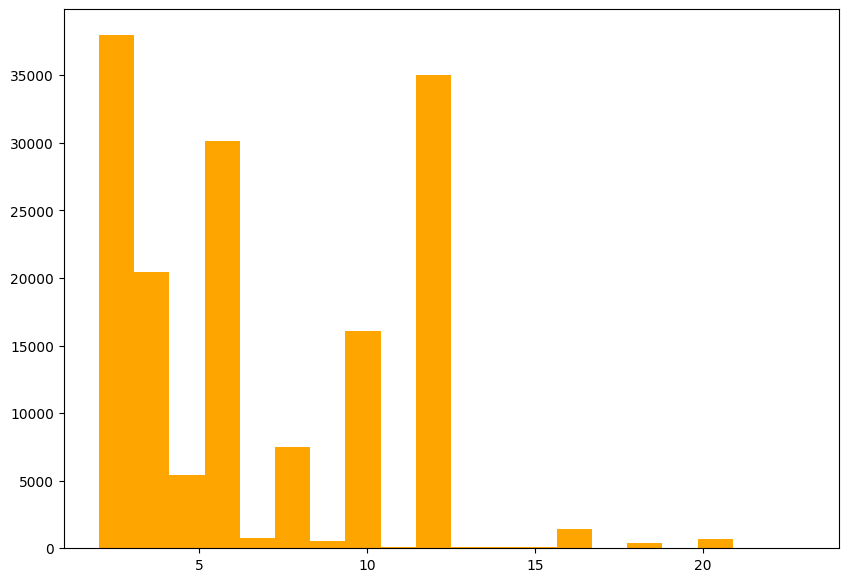

In [46]:
#histogram of quantity
plt.figure(figsize=(10,7))
plt.hist(df['Quantity'],color='orange', bins=20)
plt.show()

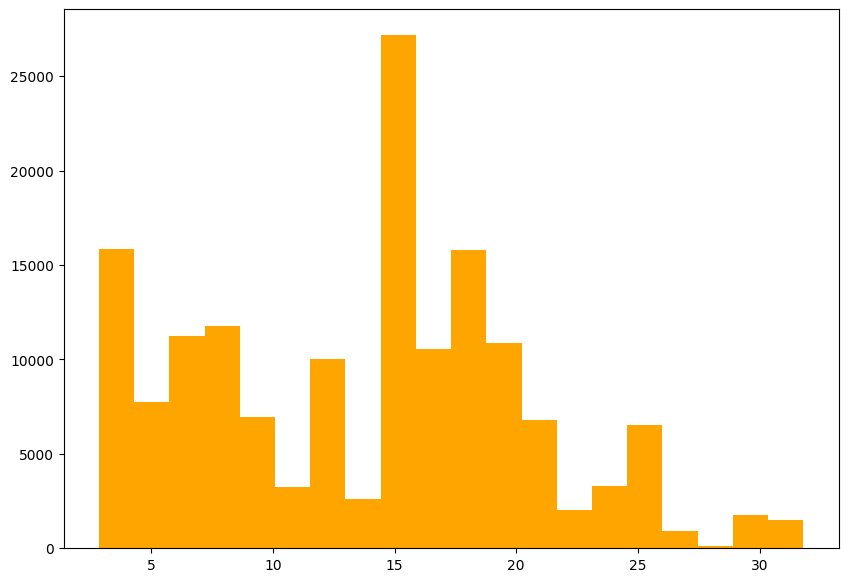

In [47]:
#histogram of TotalAmount
plt.figure(figsize=(10,7))
plt.hist(df['TotalAmount'],color='orange', bins=20)
plt.show()

C:\Users\LWY520\AppData\Local\Temp\ipykernel_25440\1183580103.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quantity'],kde=True,bins=20)


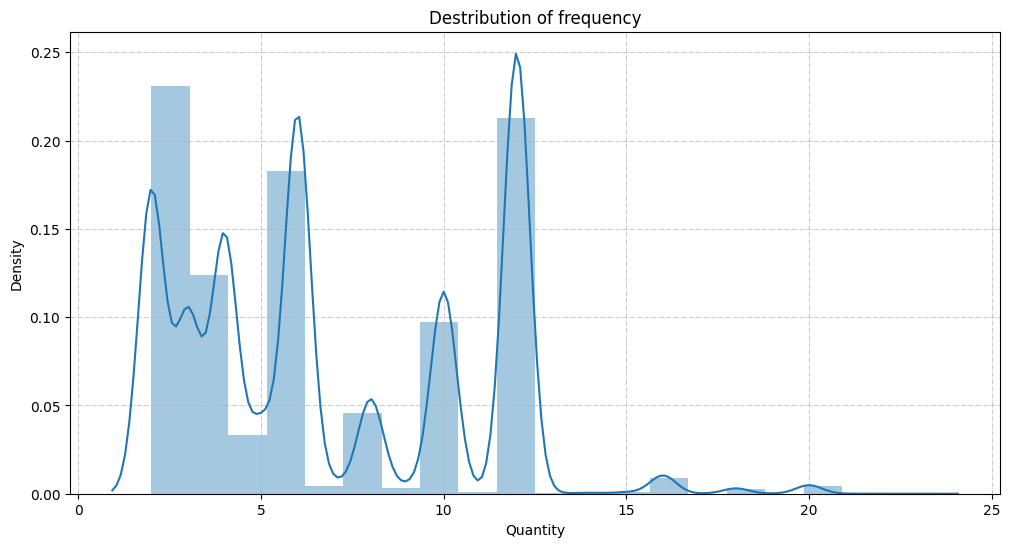

In [48]:
#distplot of quantity
plt.figure(figsize = (12,6))
sns.distplot(df['Quantity'],kde=True,bins=20)
plt.xlabel("Quantity")
plt.title("Destribution of frequency")
plt.grid(linestyle='-.',linewidth = .5)

C:\Users\LWY520\AppData\Local\Temp\ipykernel_25440\4181864221.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalAmount'],kde=True,bins=20)


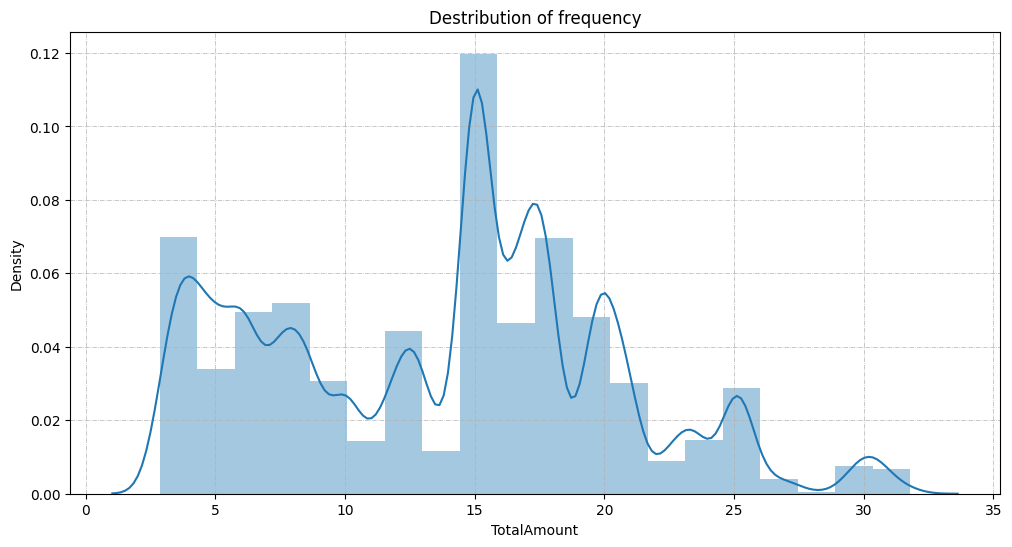

In [49]:
#distplot of TotalAmount
plt.figure(figsize = (12,6))
sns.distplot(df['TotalAmount'],kde=True,bins=20)
plt.xlabel("TotalAmount")
plt.title("Destribution of frequency")
plt.grid(linestyle='-.',linewidth = .5)

Text(0, 0.5, 'Quantity')

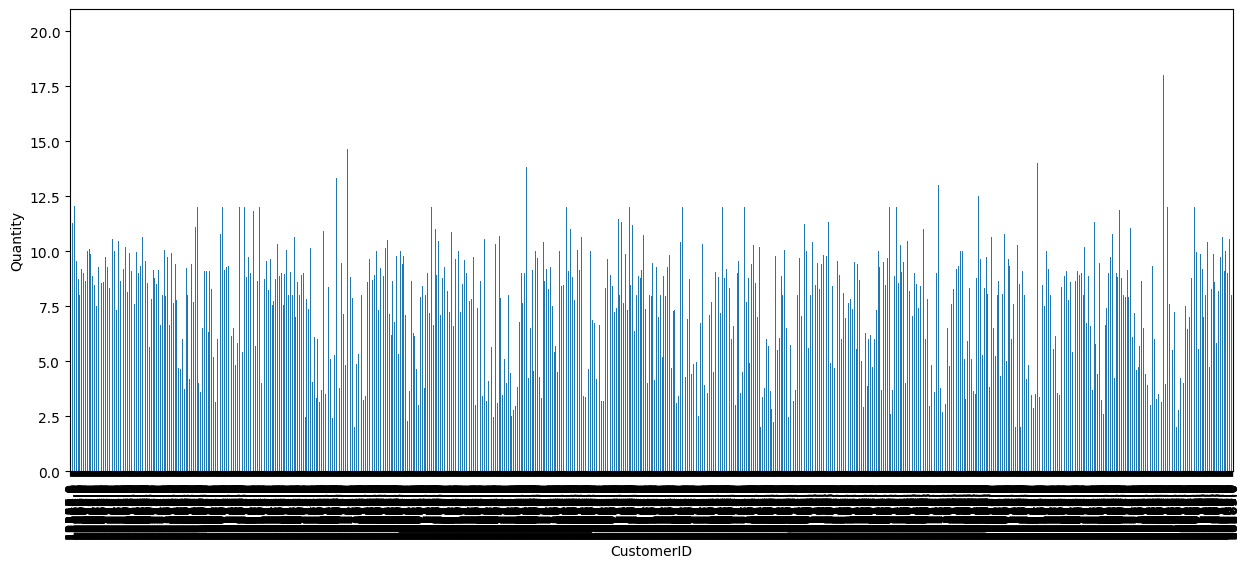

In [53]:
#bargraph of customer wise quantity
plt.figure(figsize = (15,6))
df.groupby(['CustomerID'])['Quantity'].mean().plot(kind='bar')
plt.ylabel('Quantity')

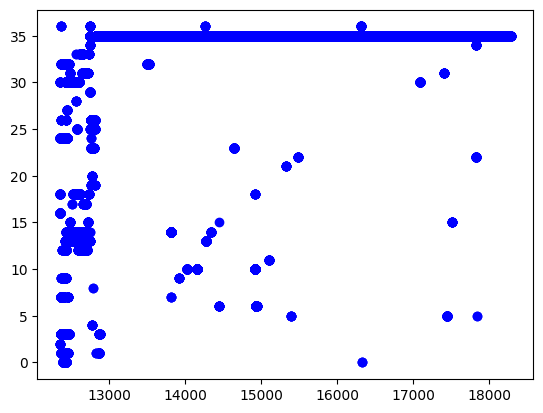

In [54]:
#scatter plot of Country_Category vs CustomerID
plt.scatter(df['CustomerID'],df['Country_Category'],color="blue")
plt.show()

ValueError: could not convert string to float: '2010-12'

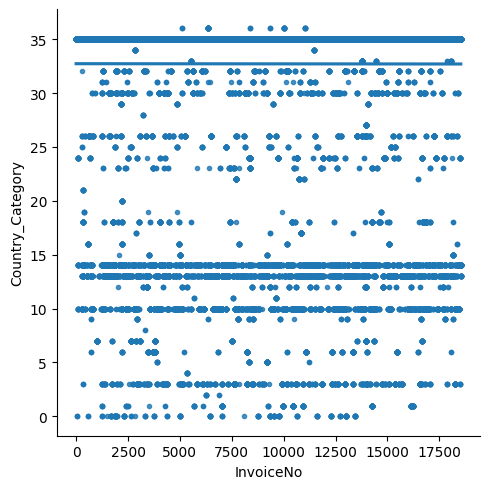

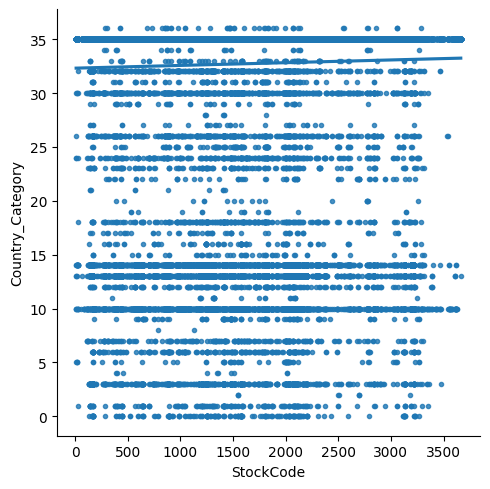

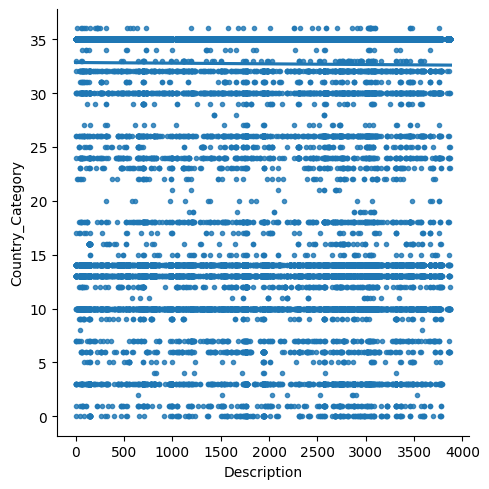

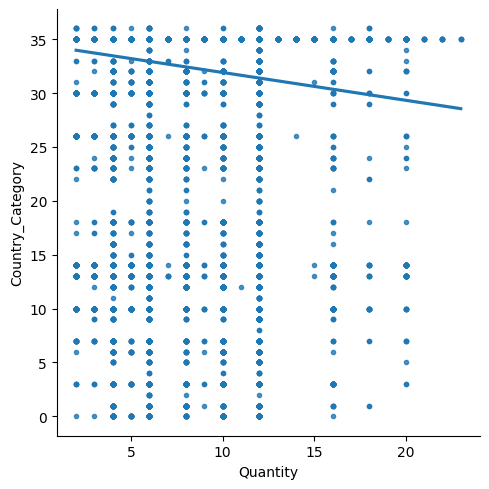

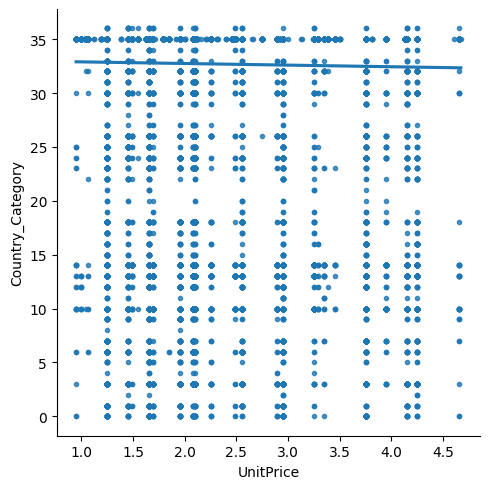

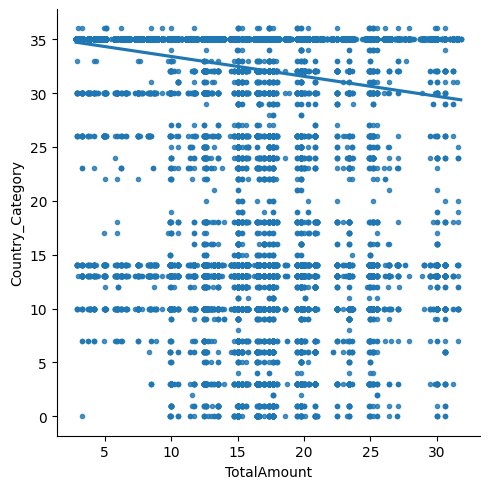

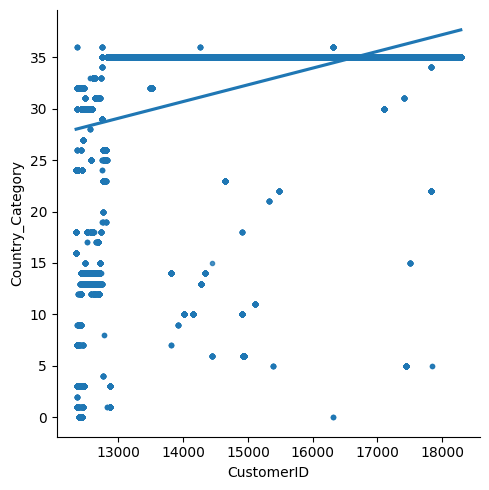

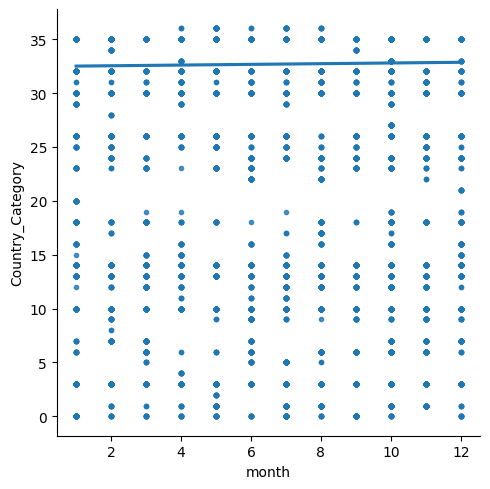

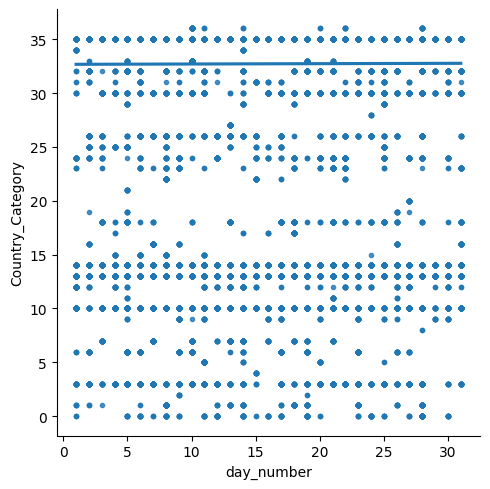

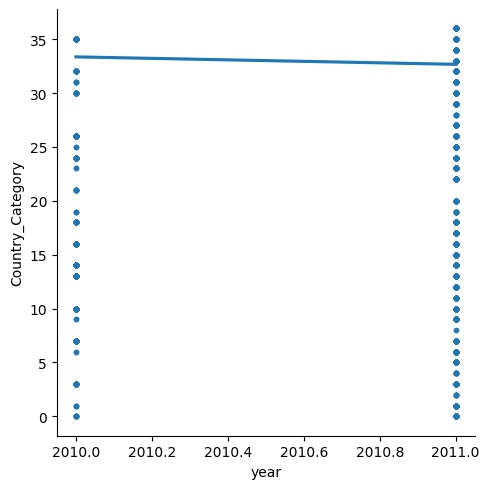

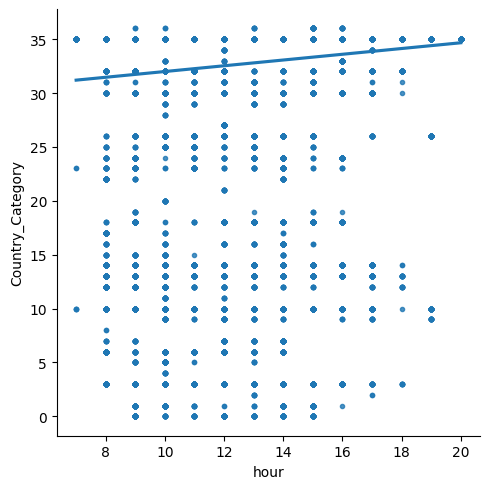

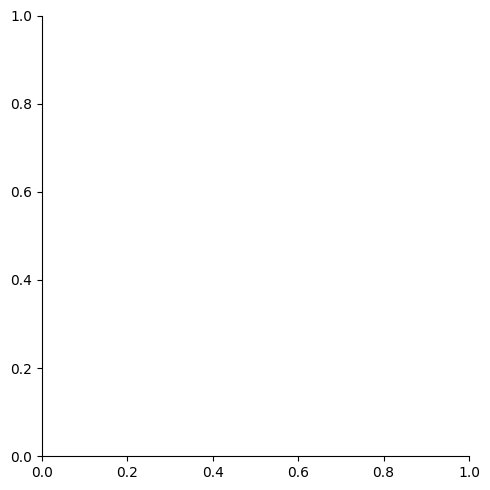

In [55]:
#lmplot to check the relation of all the columns
df=df.drop(['InvoiceDate','Country'],axis=1)
for i in df.columns.tolist():
    sns.lmplot(x=i,y='Country_Category',data=df,markers='.')
    
sns.lmplot(x='CustomerID',y='Country_Category',data=df,markers='.')

In [60]:
#find the number of unique values in columns

len(pd.unique(df['Description']))
len(pd.unique(df['Country_Category']))

37

In [64]:
#create the dependant and independant variables
X=df.drop(['Country_Category','m_y'],axis=1)
Y=df['Country_Category'].values.reshape(-1,1)
Y

array([[35],
       [35],
       [35],
       ...,
       [13],
       [13],
       [13]], dtype=int8)

In [65]:
#Perform lasso regression on the data
names=X.columns
lasso=Lasso(alpha=0.2)
lasso_coef=lasso.fit(X,Y).coef_


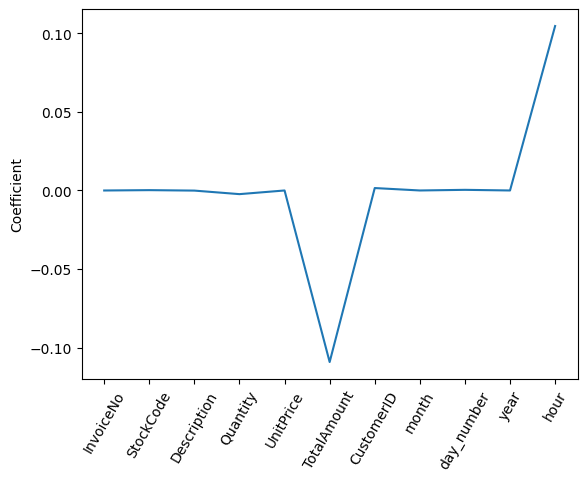

In [66]:
#plot a graph showing the coefficients of each independant variable
figure=plt.plot(range(len(names)),lasso_coef)
figure=plt.xticks(range(len(names)),names,rotation=60)
figure=plt.ylabel('Coefficient')
plt.show()

In [67]:
#create a function to find out the root mean squared error
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model,X,Y,scoring="neg_mean_squared_error",cv = 5))
    return(rmse)

In [68]:
#perform lasso regression
model_lasso = LassoCV(alphas = [1, 0.1 , 0.001, 0.0005], selection = 'random', max_iter=15000).fit(X,Y)
res= rmse_cv(model_lasso)
#find out the min and mean root mean squared error
print("Mean:",res.mean())
print("Min:",res.min())

C:\Users\LWY520\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LWY520\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LWY520\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LWY520\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d

Mean: 6.26906552836135
Min: 5.957865995447646


C:\Users\LWY520\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
#print the variables that lasso picked
coeff = pd.Series(model_lasso.coef_,index = X.columns)
print("Lasso picked"+ str(sum(coeff!=0))+"Variables and eliminated and the other"+ str(sum(coeff == 0))+" variables")

Lasso picked8Variables and eliminated and the other3 variables


In [70]:
#coefficients of all the columns
imp_coef = pd.concat([coeff.sort_values().head(10),coeff.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

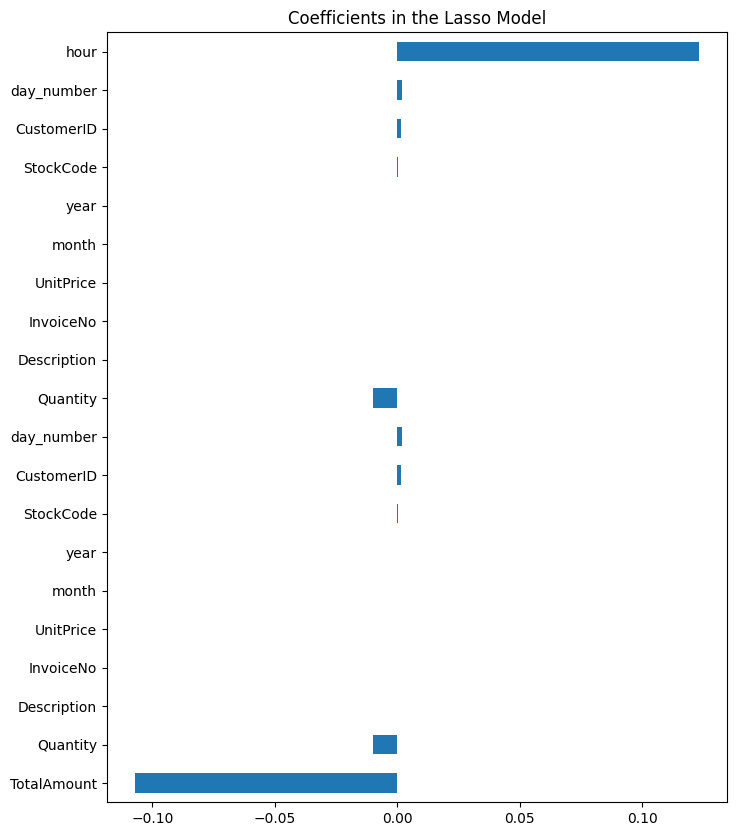

In [71]:
#plot the graph of lasso regression 
matplotlib.rcParams['figure.figsize'] =(8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [72]:
#Perform ridge regression on the data
ridge=Ridge(alpha=0.2)
ridge_coef=ridge.fit(X,Y).coef_

In [73]:
#perform ridge regression
model_ridge = RidgeCV(alphas = [1, 0.1 , 0.001, 0.0005]).fit(X,Y)
res = rmse_cv(model_ridge)

In [74]:
#find out the min and mean root mean squared error
model_ridge.coef_
print("Mean:",res.mean())
print("Min:",res.min())

Mean: 6.385176328385251
Min: 5.962823889498499


In [76]:
len(model_ridge.coef_)

1

In [80]:
#print the coefficient that ridge picked
coeff = pd.Series(model_ridge.coef_,index = X.columns)
print("Ridge Regression picked"+ str(sum(coeff!=0))+"Variables and eliminated and the other"+ str(sum(coeff == 0))+" variables")

ValueError: Length of values (1) does not match length of index (11)

In [81]:
#coefficients of all the columns
imp_coef = pd.concat([coeff.sort_values().head(10),coeff.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Ridge Regression Model')

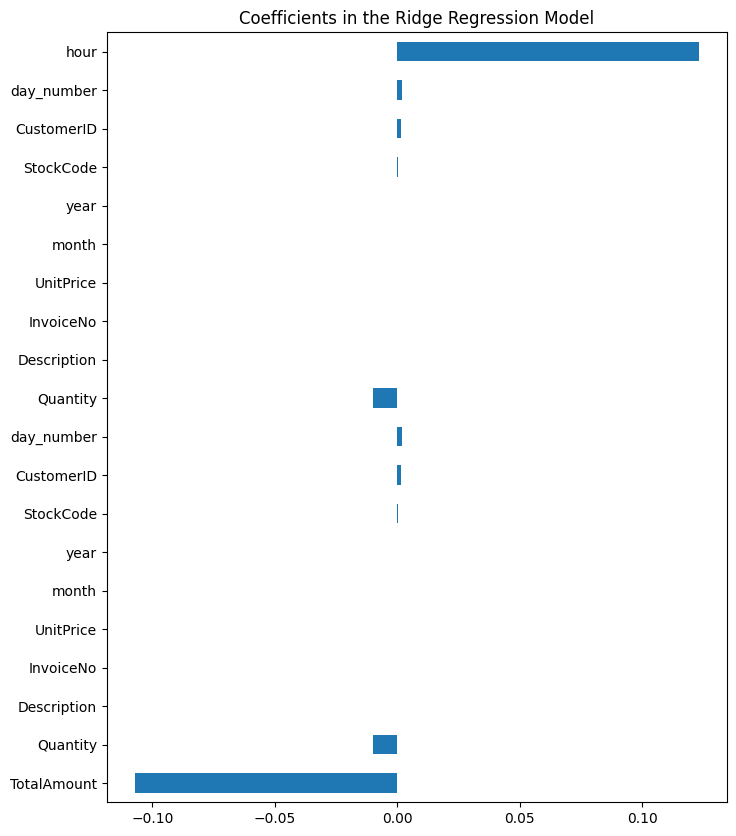

In [82]:
#plot the graph of ridge regression 
matplotlib.rcParams['figure.figsize'] =(8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Regression Model")

In [84]:
#copy df into a new dataset and drop unwanted columns
df1=df.copy()
df1.info()
df1=df1.drop(['m_y'],axis=1)

<class 'pandas.core.frame.DataFrame'>
Index: 156799 entries, 0 to 541907
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   InvoiceNo         156799 non-null  int16  
 1   StockCode         156799 non-null  int16  
 2   Description       156799 non-null  int16  
 3   Quantity          156799 non-null  int64  
 4   UnitPrice         156799 non-null  float64
 5   TotalAmount       156799 non-null  float64
 6   CustomerID        156799 non-null  float64
 7   month             156799 non-null  int32  
 8   day_number        156799 non-null  int32  
 9   year              156799 non-null  int32  
 10  hour              156799 non-null  int32  
 11  m_y               156799 non-null  object 
 12  Country_Category  156799 non-null  int8   
dtypes: float64(3), int16(3), int32(4), int64(1), int8(1), object(1)
memory usage: 10.6+ MB


In [85]:
#scale down the values of the dataset
scaler=StandardScaler()
scaler.fit(df1)
scaled_data=scaler.transform(df1)

In [86]:
#perform PCA
pca=PCA(n_components=2)
pca.fit(df1)
x_pca=pca.transform(df1)

In [88]:
x_pca

array([[ 9554.35894135,  2632.38445111],
       [ 9564.01177186,  2624.9107699 ],
       [ 9573.95664783,  2628.99982225],
       ...,
       [-8937.41888751, -2565.46927158],
       [-8943.03094535, -2561.17176769],
       [-8943.04270092, -2561.15858313]])

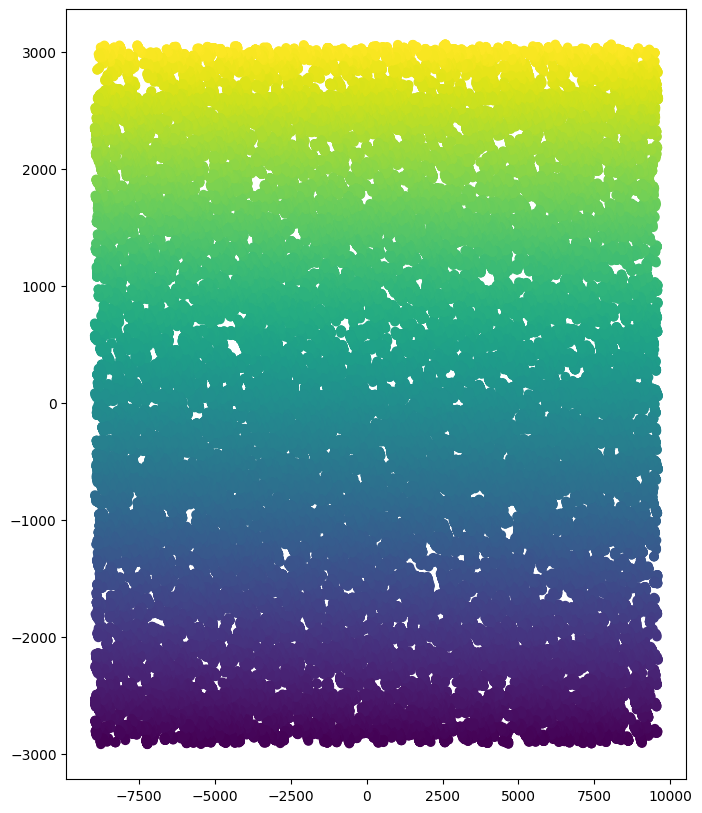

In [87]:
#the dimensionality is reduced to 2
x_pca.shape

#plot the x_pca
plt.scatter(x_pca[:,0],x_pca[:,1],c=df1['CustomerID'])

In [89]:
X

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,TotalAmount,CustomerID,month,day_number,year,hour
0,0,3233,3698,6,2.55,15.30,17850.0,12,1,2010,8
1,0,2643,3706,6,3.39,20.34,17850.0,12,1,2010,8
2,0,2847,858,8,2.75,22.00,17850.0,12,1,2010,8
3,0,2795,1804,6,3.39,20.34,17850.0,12,1,2010,8
4,0,2794,2763,6,3.39,20.34,17850.0,12,1,2010,8
...,...,...,...,...,...,...,...,...,...,...,...
541902,18535,1482,3316,12,1.95,23.40,12680.0,12,9,2011,12
541903,18535,2084,703,4,4.15,16.60,12680.0,12,9,2011,12
541905,18535,1742,692,6,2.10,12.60,12680.0,12,9,2011,12
541906,18535,2082,698,4,4.15,16.60,12680.0,12,9,2011,12


In [90]:
#drop unwanted columns and create independant and dependant variables for non linear algorithms
X1=X.drop(['InvoiceNo','Description','UnitPrice'],axis=1)
Y1=Y

In [91]:
#split train and test data
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.3)

In [94]:
x_train

,StockCode,Quantity,TotalAmount,CustomerID,month,day_number,year,hour
281388,422,12,17.40,15261.0,7,27,2011,15
513815,312,10,12.50,16657.0,11,30,2011,11
159887,1811,2,5.10,17284.0,4,18,2011,11
144508,1833,12,23.40,12471.0,4,4,2011,12
89977,1808,6,17.70,15358.0,2,15,2011,8
...,...,...,...,...,...,...,...,...
219667,1519,2,5.90,14056.0,6,8,2011,16
179167,1902,3,12.45,14161.0,5,8,2011,11
208203,389,6,17.70,12790.0,5,31,2011,14
450107,3233,6,17.70,18216.0,11,8,2011,16


In [96]:
y_train

array([[35],
       [35],
       [35],
       ...,
       [23],
       [35],
       [13]], dtype=int8)

In [92]:
#perform decision tree algorithm
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred=dt.predict(x_test)

In [93]:
#print the accuracy score for decision tree
print(accuracy_score(y_test,y_pred))

0.9991496598639455


In [99]:
#classification report of decision tree
cr_dt=classification_report(y_test, y_pred)
print(cr_dt)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.96      1.00      0.98        53
           2       1.00      0.50      0.67         4
           3       1.00      1.00      1.00       331
           4       1.00      0.60      0.75         5
           5       0.87      0.95      0.91        21
           6       0.99      1.00      1.00       108
           7       1.00      1.00      1.00        72
           9       1.00      1.00      1.00        40
          10       1.00      1.00      1.00       880
          11       1.00      1.00      1.00         8
          12       1.00      0.95      0.97        79
          13       1.00      1.00      1.00      1163
          14       1.00      1.00      1.00      1264
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        29
          17       1.00      0.91      0.95        23
          18       0.95    

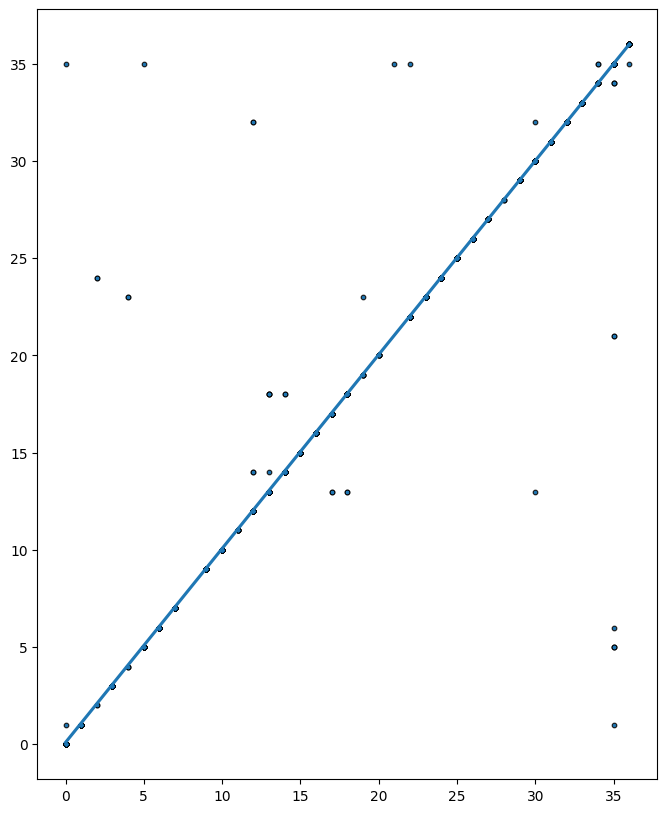

In [101]:
#using regplot for decision tree
sns.regplot(x=y_test,y=y_pred,order=1, ci=None, scatter_kws={'color':'black', 's':10})
plt.scatter(y_test,y_pred,s=2)

In [102]:
#perform support vector machine algorithm
svm1 = SVC()
svm1.fit(x_train,y_train)
y_pred = svm1.predict(x_test)
#print accuracy score for support vector machine
print(accuracy_score(y_test,y_pred))


C:\Users\LWY520\anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9090136054421769


In [103]:
#classification report of support vector machine
cr_svm1=classification_report(y_test, y_pred)
print(cr_svm1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00       331
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00       108
           7       0.00      0.00      0.00        72
           9       0.00      0.00      0.00        40
          10       0.00      0.00      0.00       880
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00        79
          13       0.00      0.00      0.00      1163
          14       0.31      0.86      0.46      1264
          15       0.00      0.00      0.00        19
          16       0.00      0.00      0.00        29
          17       0.00      0.00      0.00        23
          18       0.00    

C:\Users\LWY520\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LWY520\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LWY520\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [105]:
#perform random forest algorithm
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
#print accuracy score for random forest
print(accuracy_score(y_test,y_pred))

C:\Users\LWY520\anaconda\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9925807823129251


In [106]:
#classification report of random forest
cr_rfc=classification_report(y_test, y_pred)
print(cr_rfc)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       1.00      0.92      0.96        53
           2       1.00      0.50      0.67         4
           3       0.95      0.97      0.96       331
           4       1.00      1.00      1.00         5
           5       1.00      0.86      0.92        21
           6       1.00      0.90      0.95       108
           7       0.99      0.94      0.96        72
           9       0.97      0.93      0.95        40
          10       1.00      0.93      0.96       880
          11       1.00      0.62      0.77         8
          12       0.99      0.86      0.92        79
          13       0.95      0.96      0.95      1163
          14       0.96      0.95      0.96      1264
          15       1.00      0.79      0.88        19
          16       1.00      1.00      1.00        29
          17       1.00      0.78      0.88        23
          18       0.99    

C:\Users\LWY520\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LWY520\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LWY520\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [109]:
#create a suitable range of clusters
k_range=range(1,11)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['CustomerID','Country_Category']])
    sse.append(km.inertia_)

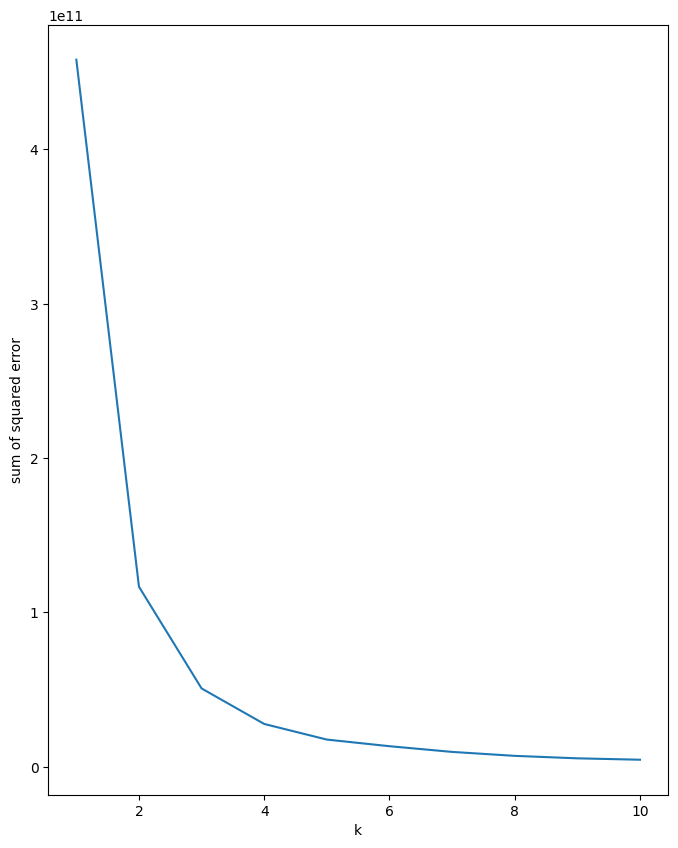

In [110]:
#plot a graph to finalise cluster number by using the elbow rule
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_range,sse)

In [111]:
#perform KMeans clustering
km1=KMeans(n_clusters=3)
y_predicted=km1.fit_predict(df[['CustomerID','Country_Category']])
df['cluster']=y_predicted


In [112]:
#create datasets with different specific cluster values
cluster1=df[df.cluster==0]
cluster2=df[df.cluster==1]
cluster3=df[df.cluster==2]

In [113]:
#find the centroids of each clusters
centroids=km1.cluster_centers_

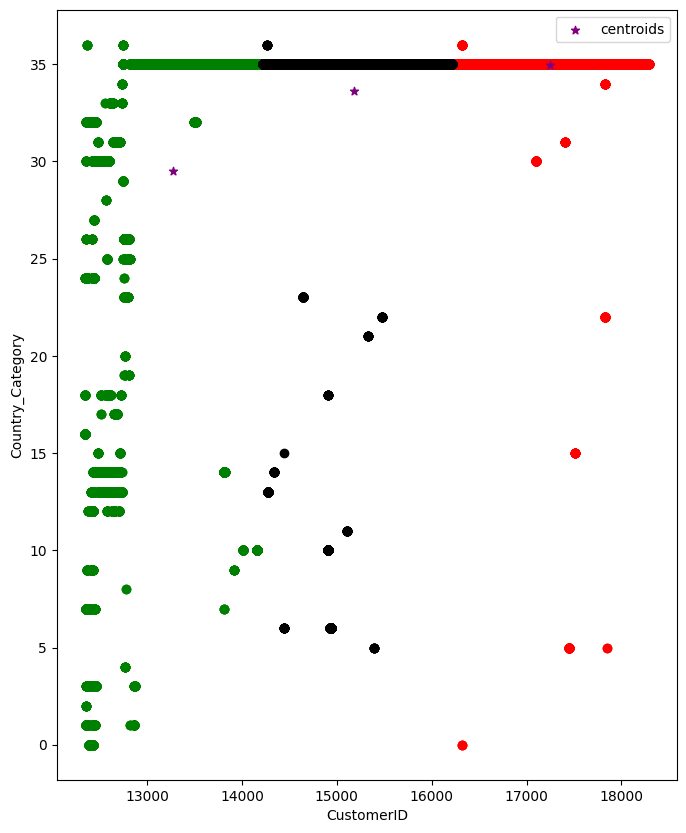

In [114]:
#plot the cluster graph
plt.scatter(cluster1.CustomerID,cluster1['Country_Category'],color='green')
plt.scatter(cluster2.CustomerID,cluster2['Country_Category'],color='red')
plt.scatter(cluster3.CustomerID,cluster3['Country_Category'],color='black')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color='purple',marker='*',label='centroids')
plt.xlabel('CustomerID')
plt.ylabel('Country_Category')
plt.legend()
plt.show()

In [115]:
#copy data from df into new dataset for hierarchical clustering
h_data=df[['Country_Category','CustomerID']].copy()
h_data.info()
h_data['CustomerID']=h_data["CustomerID"].astype('int')

<class 'pandas.core.frame.DataFrame'>
Index: 156799 entries, 0 to 541907
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Country_Category  156799 non-null  int8   
 1   CustomerID        156799 non-null  float64
dtypes: float64(1), int8(1)
memory usage: 2.5 MB


In [116]:
#using dendogram to find optimal number of clusters
dendrogram=sch.dendrogram(sch.linkage(h_data,method='ward'))

MemoryError: Unable to allocate 91.6 GiB for an array with shape (12292884801,) and data type float64

In [117]:
#perform hierarchical clustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(h_data)

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'